In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from genetic_algorithm import GeneticFeatures

from sklearn import linear_model



pd.set_option('display.max_columns', None)

In [2]:
# Import data
data = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/final_data.csv')
data = data.fillna(0)


In [3]:
y = data['GBA6RTT']/100
X = data.drop(columns = ['Unnamed: 0', 'UNITID', 'INSTNM', 'STABBR', 'ZIP', 'LOCALE', 'OBEREG','GBA6RTT', 'GBA6RTM', 'GBA6RTW'])

In [4]:
# Create test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Running DT without Genetic Algorithm - Finding best starting parameters

In [13]:
max_depth = np.arange(1,30+1)
rmse = []

for depth in max_depth:
    regressor = DecisionTreeRegressor(random_state = 0, max_depth = depth)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

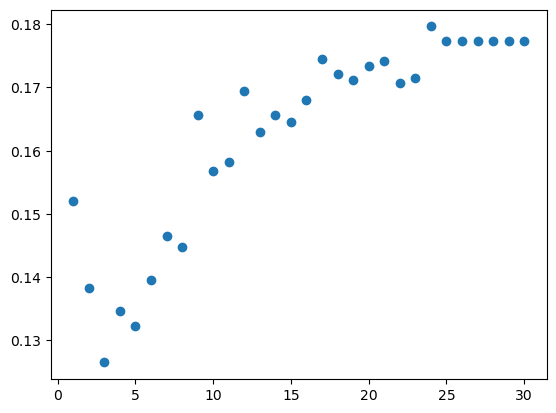

In [14]:
plt.scatter(max_depth, rmse)

In [7]:
min_split = np.arange(2, 60+1)
rmse = []

for split in min_split:
    regressor = DecisionTreeRegressor(random_state = 0, min_samples_split = split)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

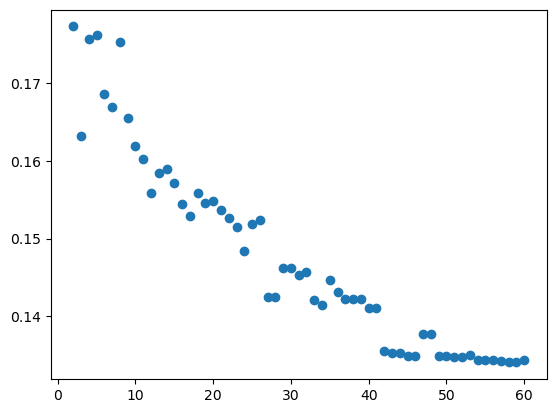

In [8]:
plt.scatter(min_split, rmse)

In [9]:
min_leaf = np.arange(2, 60+1)
rmse = []

for leaf in min_leaf:
    regressor = DecisionTreeRegressor(random_state = 0, min_samples_leaf = leaf)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

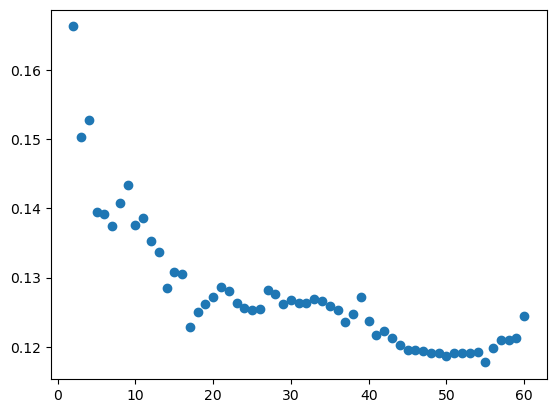

In [10]:
plt.scatter(min_split, rmse)

In [11]:
regressor = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 45)  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(regressor.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred, squared = False))

0.6157601754323201
0.11957790897329403


In [12]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred, squared = False))

0.569065640272691
0.12663545894237294


Running Genetic Algorithm on DT

In [4]:
# Same parameters as baseline
model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 45)  

In [5]:
genAlgo = GeneticFeatures(X, y, 40, 20, model, 0.2, 150)
genAlgo.run()

Starting Genetic Feature Selection
Genetic Feature Selection Complete


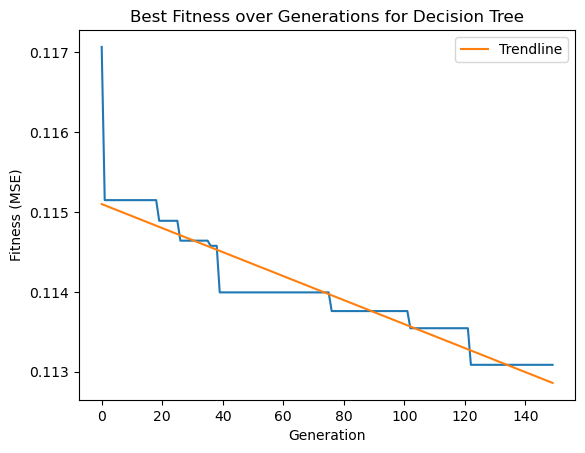

In [8]:
fitness = genAlgo.best_scores

plt.plot(np.arange(0,150), fitness)
m, b = np.polyfit(np.arange(0,150), fitness, 1)
plt.plot(np.arange(0,150), m*np.arange(0,150) + b, label='Trendline')
plt.xlabel('Generation')
plt.ylabel('Fitness (MSE)')
plt.title('Best Fitness over Generations for Decision Tree')
plt.legend()

Test various parameters

In [34]:
model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 24)  

In [35]:
genAlgo = GeneticFeatures(X, y, 50, 40, model, 0.2, 150)
genAlgo.run()

Starting Genetic Feature Selection
Genetic Feature Selection Complete


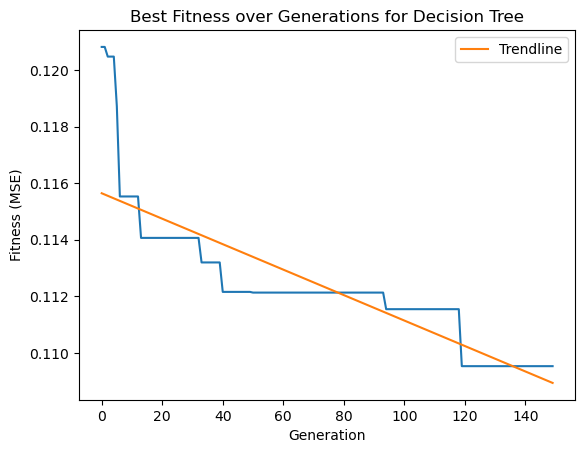

In [36]:
fitness = genAlgo.best_scores

plt.plot(np.arange(0,150), fitness)
m, b = np.polyfit(np.arange(0,150), fitness, 1)
plt.plot(np.arange(0,150), m*np.arange(0,150) + b, label='Trendline')
plt.xlabel('Generation')
plt.ylabel('Fitness (MSE)')
plt.title('Best Fitness over Generations for Decision Tree')
plt.legend()

Testing parameters for GA

In [4]:
scores = pd.DataFrame(columns=['population_size', 'mutation_rate', 'score'])

for p in [40, 50, 60]:
    n_parents = p//2
    for m in [.1, .2, .3]:
        model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 24)  
        genAlgo = GeneticFeatures(X, y, p, n_parents, model, m, 150)
        genAlgo.run()
        best_score = genAlgo.best_scores[-1]

        new_row = {'population_size': p, 'mutation_rate': m, 'score': best_score}
        scores = scores._append(new_row, ignore_index=True)


Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection


/var/folders/gs/p45j3_px5tqcz1lyxfph18400000gn/T/ipykernel_12510/39761328.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = scores._append(new_row, ignore_index=True)


Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete


In [5]:
scores

,population_size,mutation_rate,score
0,40.0,0.1,0.109218
1,40.0,0.2,0.110622
2,40.0,0.3,0.110676
3,50.0,0.1,0.107957
4,50.0,0.2,0.108723
5,50.0,0.3,0.113778
6,60.0,0.1,0.104852
7,60.0,0.2,0.110178
8,60.0,0.3,0.111028


In [20]:
# Run best algorithm
model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 24)  
genAlgo = GeneticFeatures(X, y, 60, 60//2, model, 0.1, 150)
genAlgo.run()

Starting Genetic Feature Selection
Genetic Feature Selection Complete


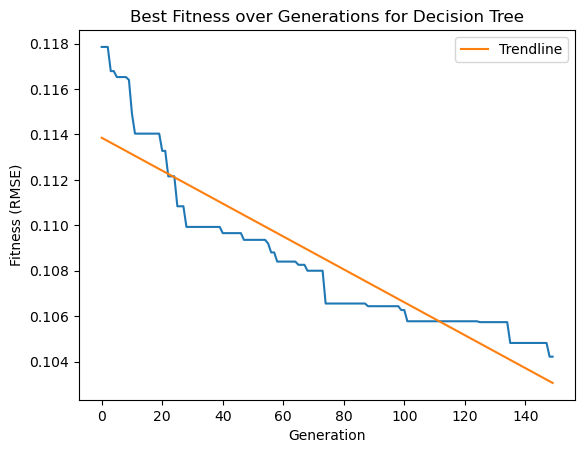

In [21]:
fitness = genAlgo.best_scores

plt.plot(np.arange(0,150), fitness)
m, b = np.polyfit(np.arange(0,150), fitness, 1)
plt.plot(np.arange(0,150), m*np.arange(0,150) + b, label='Trendline')
plt.xlabel('Generation')
plt.ylabel('Fitness (RMSE)')
plt.title('Best Fitness over Generations for Decision Tree')
plt.legend()

Run Genetic Algorithm on Linear Regression

In [8]:
reg = linear_model.LinearRegression()

genAlgo = GeneticFeatures(X, y, 40, 20, reg, 0.2, 150)
genAlgo.run()

Starting Genetic Feature Selection
Running Generation 0
Best Fitness score: 0.11982674066400084

Running Generation 1
Best Fitness score: 0.11866490810795098

Running Generation 2
Best Fitness score: 0.11729966563020716

Running Generation 3
Best Fitness score: 0.11500524688020602

Running Generation 4
Best Fitness score: 0.11500524688020602

Running Generation 5
Best Fitness score: 0.11500524688020602

Running Generation 6
Best Fitness score: 0.11500524688020602

Running Generation 7
Best Fitness score: 0.11296944781967327

Running Generation 8
Best Fitness score: 0.11296944781967327

Running Generation 9
Best Fitness score: 0.11296944781967327

Running Generation 10
Best Fitness score: 0.11296944781967327

Running Generation 11
Best Fitness score: 0.11296944781967327

Running Generation 12
Best Fitness score: 0.11279672314182182

Running Generation 13
Best Fitness score: 0.11279672314182182

Running Generation 14
Best Fitness score: 0.11279672314182182

Running Generation 15
Best Fit

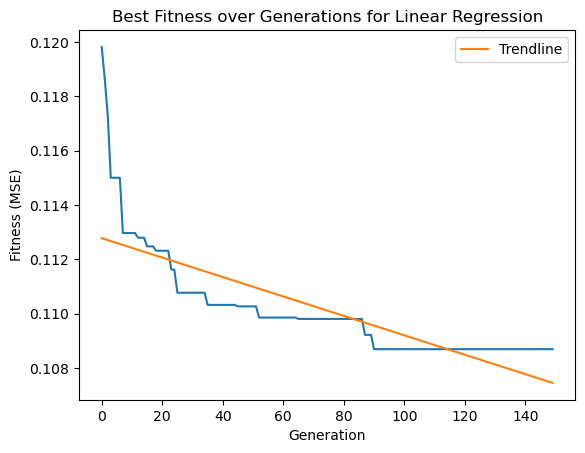

In [9]:
fitness = genAlgo.best_scores

plt.plot(np.arange(0,150), fitness)
m, b = np.polyfit(np.arange(0,150), fitness, 1)
plt.plot(np.arange(0,150), m*np.arange(0,150) + b, label='Trendline')
plt.xlabel('Generation')
plt.ylabel('Fitness (RMSE)')
plt.title('Best Fitness over Generations for Linear Regression')
plt.legend()

In [8]:
scores = pd.DataFrame(columns=['population_size', 'mutation_rate', 'score'])

for p in [40, 50, 60]:
    n_parents = p//2
    for m in [.1, .2, .3]:
        model = linear_model.LinearRegression()
        genAlgo = GeneticFeatures(X, y, p, n_parents, model, m, 150)
        genAlgo.run()
        best_score = genAlgo.best_scores[-1]

        new_row = {'population_size': p, 'mutation_rate': m, 'score': best_score}
        scores = scores._append(new_row, ignore_index=True)

Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection


/var/folders/gs/p45j3_px5tqcz1lyxfph18400000gn/T/ipykernel_12510/3416108988.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = scores._append(new_row, ignore_index=True)


Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete
Starting Genetic Feature Selection
Genetic Feature Selection Complete


In [9]:
scores

,population_size,mutation_rate,score
0,40.0,0.1,0.105645
1,40.0,0.2,0.108374
2,40.0,0.3,0.108780
3,50.0,0.1,0.106211
4,50.0,0.2,0.109573
5,50.0,0.3,0.111207
6,60.0,0.1,0.106391
7,60.0,0.2,0.109221
8,60.0,0.3,0.110301


In [23]:
# Run best algorithm
model = linear_model.LinearRegression()
genAlgo = GeneticFeatures(X, y, 40, 25, model, .1, 150)
genAlgo.run()

Starting Genetic Feature Selection
Genetic Feature Selection Complete


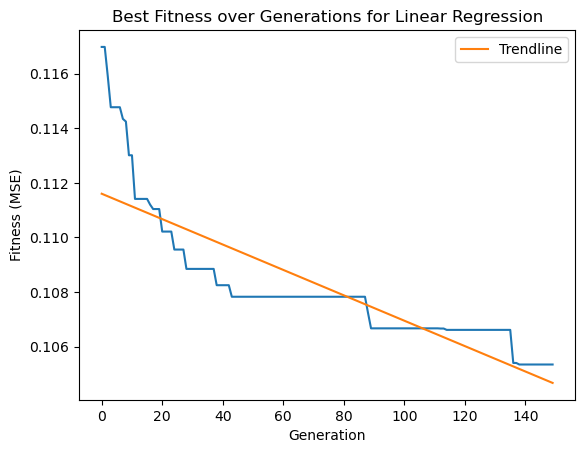

In [24]:
fitness = genAlgo.best_scores

plt.plot(np.arange(0,150), fitness)
m, b = np.polyfit(np.arange(0,150), fitness, 1)
plt.plot(np.arange(0,150), m*np.arange(0,150) + b, label='Trendline')
plt.xlabel('Generation')
plt.ylabel('Fitness (MSE)')
plt.title('Best Fitness over Generations for Linear Regression')
plt.legend()

In [27]:
sum(genAlgo.best_chromosomes[-1])

106